In [5]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

In [3]:
#Exercise 1: Data Preparation and Choosing a Classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))


Class distribution: [35 35 35]


In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate nonlinear dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Combine for visualization
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Print class distribution
print("Class distribution:", np.bincount(y_train))


Class distribution: [70 70]


Accuracy: 0.8666666666666667


/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


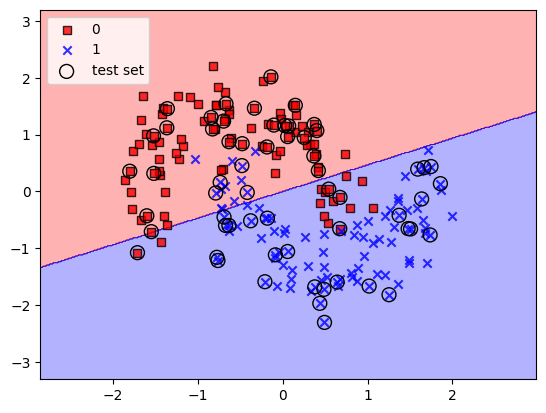

Text(0, 0.5, 'Petal width [standardized]')

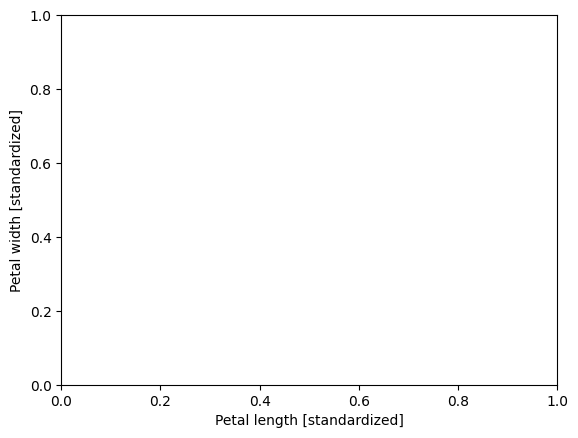

In [8]:
#Exercise 2
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

eta0=0.01 → Accuracy: 0.78


/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


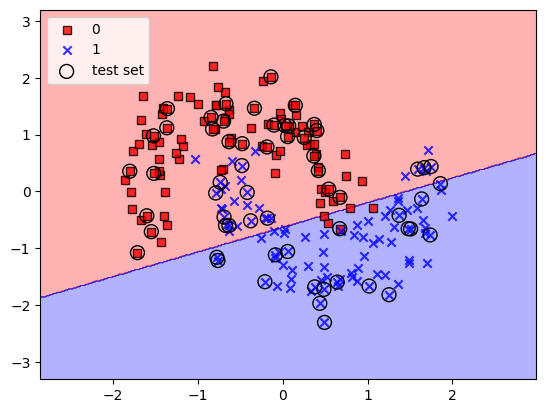

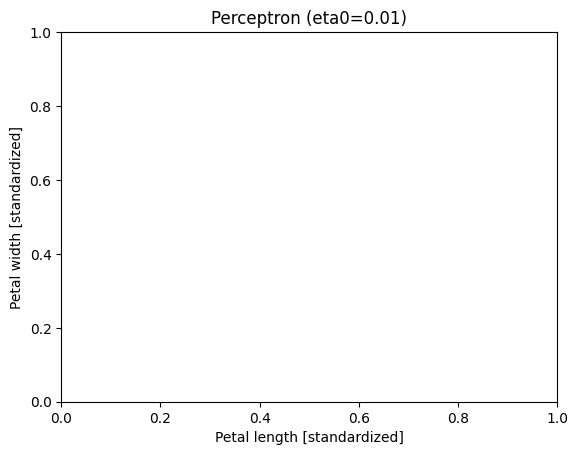

eta0=0.1 → Accuracy: 0.87


/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


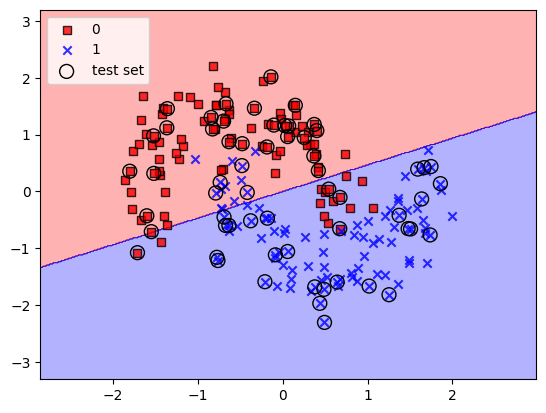

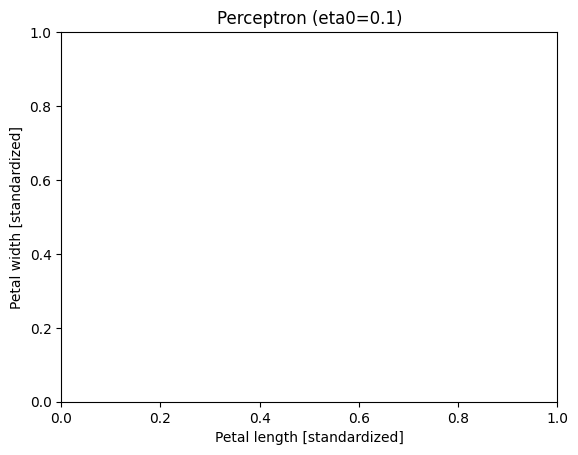

eta0=1 → Accuracy: 0.87


/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


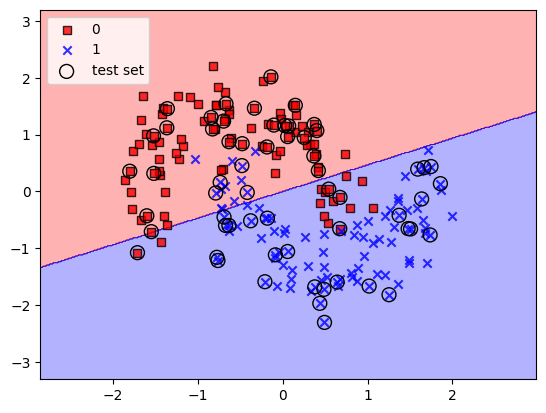

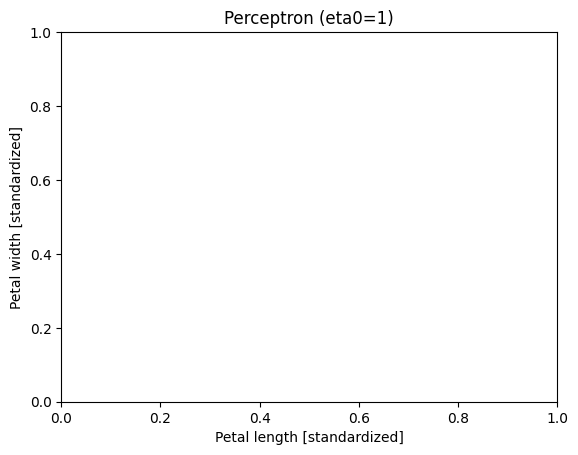

In [9]:
#Exercise 2
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def run_perceptron(X_train_std, X_test_std, y_train, y_test,
                   X_combined_std, y_combined, eta0):
    ppn = Perceptron(max_iter=40, eta0=eta0, random_state=1)
    ppn.fit(X_train_std, y_train)

    y_pred = ppn.predict(X_test_std)
    print(f"eta0={eta0} → Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    # decision boundary
    plot_decision_regions(X_combined_std, y_combined, classifier=ppn,
                          test_idx=range(len(X_train_std), len(X_combined_std)))
    plt.xlabel("Petal length [standardized]")
    plt.ylabel("Petal width [standardized]")
    plt.title(f"Perceptron (eta0={eta0})")
    plt.show()

# Try different learning rates
for lr in [0.01, 0.1, 1]:
    run_perceptron(X_train_std, X_test_std, y_train, y_test,
                   X_combined_std, y_combined, lr)


Moons dataset fails because :
The Perceptron is a linear classifier.

Moons dataset is NOT linearly separable → classes are curved, interleaved.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


C=0.01 → Accuracy: 0.87
Probabilities (first 3 test samples):
 [[0.64308892 0.35691108]
 [0.33344098 0.66655902]
 [0.67669394 0.32330606]]


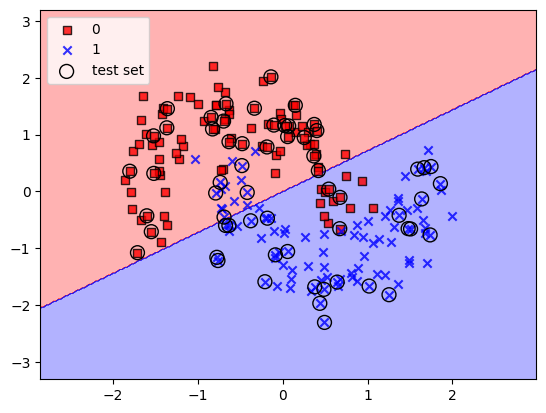

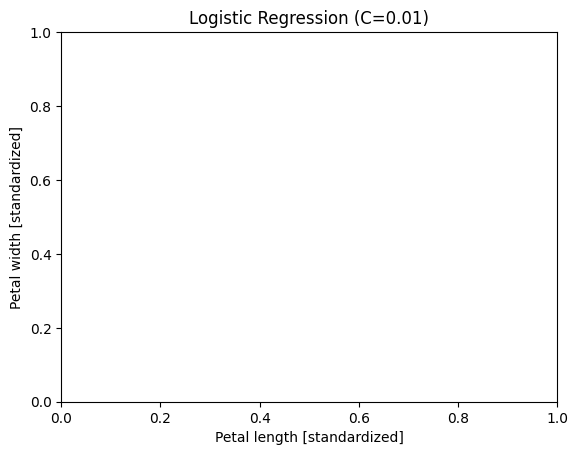

C=1 → Accuracy: 0.85
Probabilities (first 3 test samples):
 [[0.91933159 0.08066841]
 [0.01980474 0.98019526]
 [0.97176496 0.02823504]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


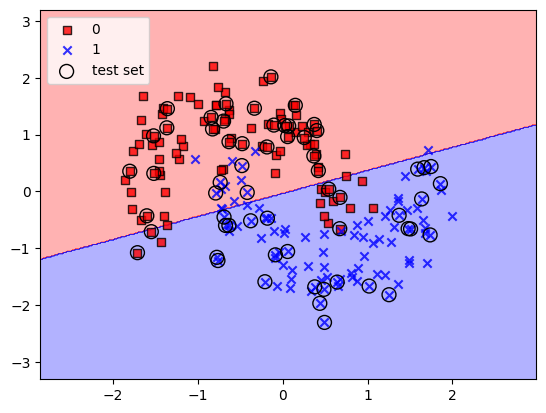

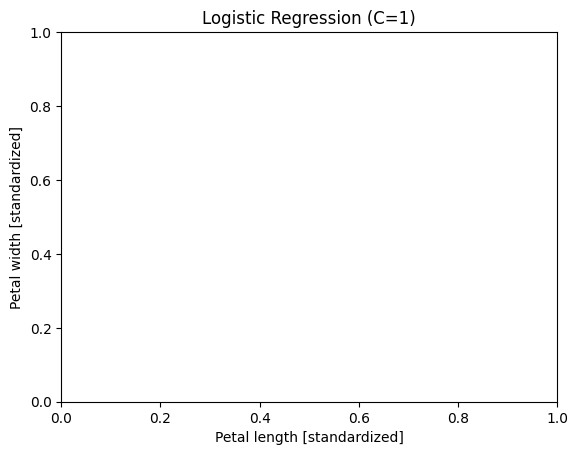

C=100 → Accuracy: 0.85
Probabilities (first 3 test samples):
 [[0.93849467 0.06150533]
 [0.01000784 0.98999216]
 [0.98323789 0.01676211]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


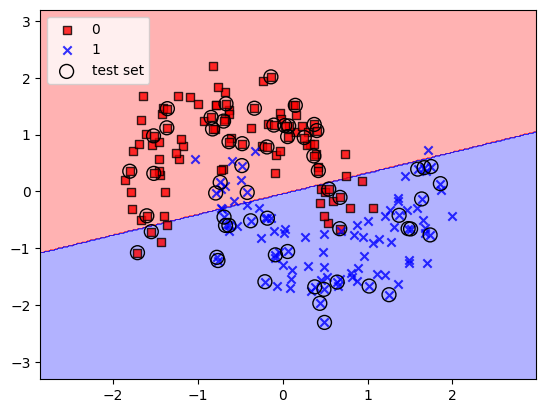

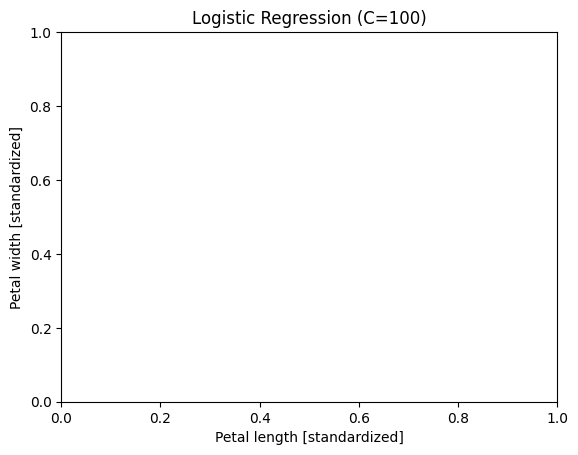

In [10]:
#Exercise 3: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def run_logreg(X_train_std, X_test_std, y_train, y_test,
               X_combined_std, y_combined, C_val):
    lr = LogisticRegression(C=C_val, random_state=1,
                            solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)

    y_pred = lr.predict(X_test_std)
    print(f"C={C_val} → Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Probabilities (first 3 test samples):\n", lr.predict_proba(X_test_std[:3]))

    # decision boundary
    plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                          test_idx=range(len(X_train_std), len(X_combined_std)))
    plt.xlabel("Petal length [standardized]")
    plt.ylabel("Petal width [standardized]")
    plt.title(f"Logistic Regression (C={C_val})")
    plt.show()

# Try different C values
for c in [0.01, 1, 100]:
    run_logreg(X_train_std, X_test_std, y_train, y_test,
               X_combined_std, y_combined, c)



In [11]:
import numpy as np

class LogisticRegressionGD:
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = np.random.RandomState(random_state)

    def fit(self, X, y):
        self.w_ = self.random_state.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.
        self.losses_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_ += self.eta * X.T.dot(errors)
            self.b_ += self.eta * errors.sum()
            # cross-entropy loss
            loss = -np.mean(y * np.log(output + 1e-8) + (1 - y) * np.log(1 - output + 1e-8))
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        return 1. / (1. + np.exp(-z))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


Accuracy: 0.85


/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


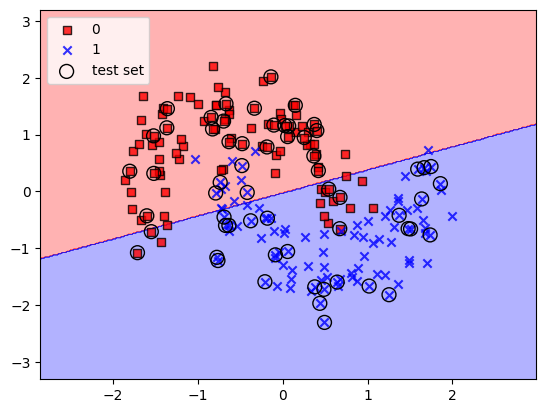

Text(0, 0.5, 'Petal width [standardized]')

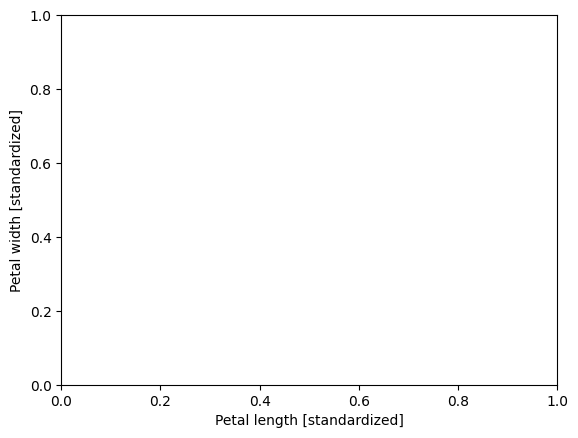

In [12]:
# Exercise 4: Support Vector Machines (SVM)
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

C = 100.0 (hard margin, less regularization)

Model penalizes misclassifications heavily.

Margin is narrower, decision boundary fits training data more tightly.

Risk of overfitting if data has noise.

Support vectors per class: [3 6 6]

Accuracy: 0.8333333333333334


/tmp/ipython-input-4244765045.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


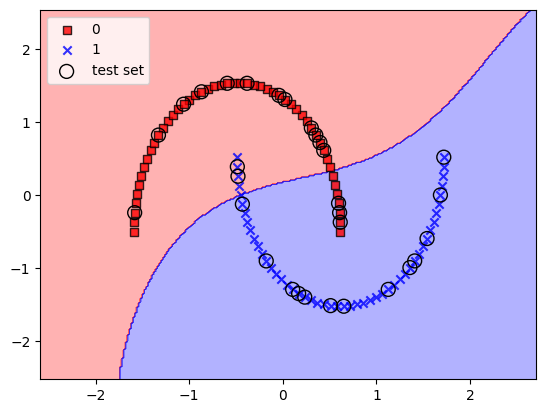

Text(0, 0.5, 'Feature 2 [standardized]')

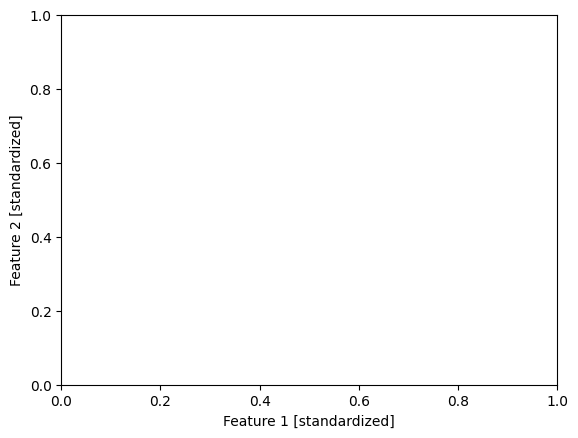

In [15]:
# Exercise 5: Kernel SVM
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=100, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm_rbf.fit(X_train_m_std, y_train_m)

y_pred_m = svm_rbf.predict(X_test_m_std)
print('Accuracy:', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf, test_idx=range(len(X_train_m), len(X_combined_m_std)))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')


Effect of gamma

Gamma = 0.01 (low)-Each support vector has a very wide influence.Boundary is smooth and simple.Might underfit (poor fit to curved moons).

Gamma = 1 (moderate)-Decision boundary adapts to curved shape of moons.Typically gives best performance.

Gamma = 100 (high)-Each support vector has very narrow influence.Boundary becomes wiggly/overfit (fits training noise).Test accuracy may drop.

Comparison
Linear SVM on Iris (petal features) → already works very well (because the 3 species are almost linearly separable).

RBF SVM with low gamma (0.01) → almost the same as linear (smooth, underfits).

RBF SVM with gamma=1 → boundary adapts slightly, but similar accuracy to linear.

RBF SVM with gamma=100 → extremely wiggly boundaries, can overfit training data but doesn’t generalize well.

Accuracy: 0.9


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


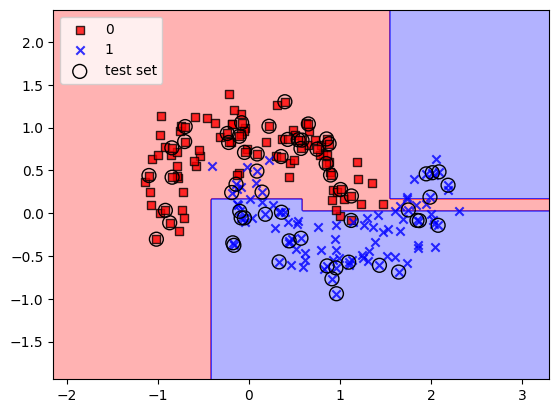

True

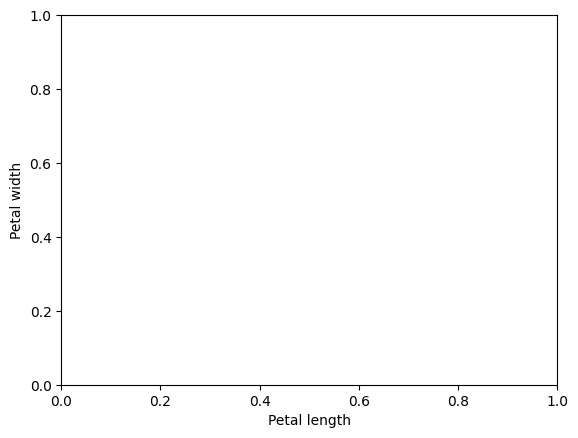

In [23]:
# Exercise 6: Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)  # No scaling needed

y_pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'],
                          feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')


max_depth=1 → Accuracy: 0.78


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


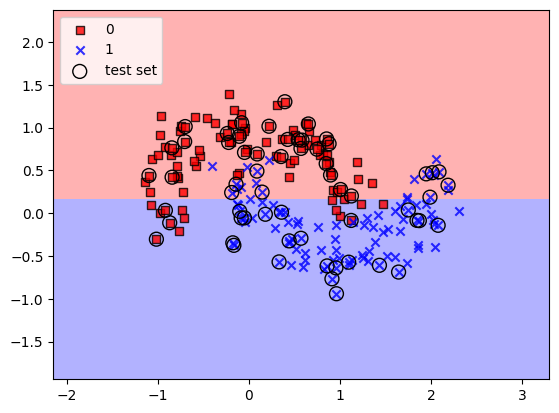

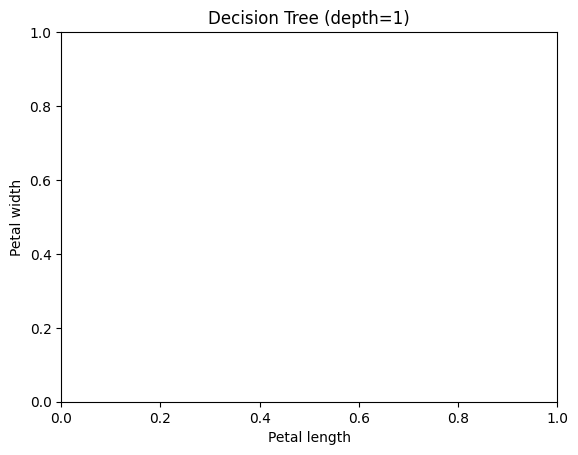

max_depth=2 → Accuracy: 0.92


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


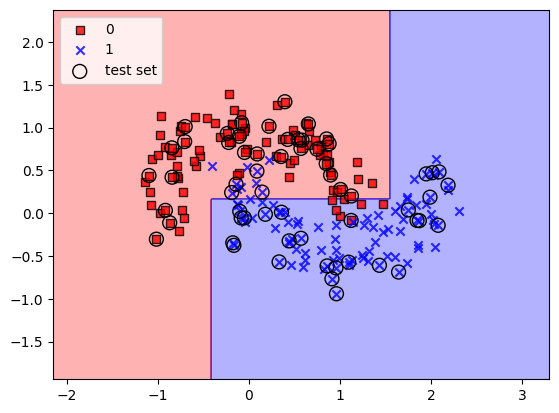

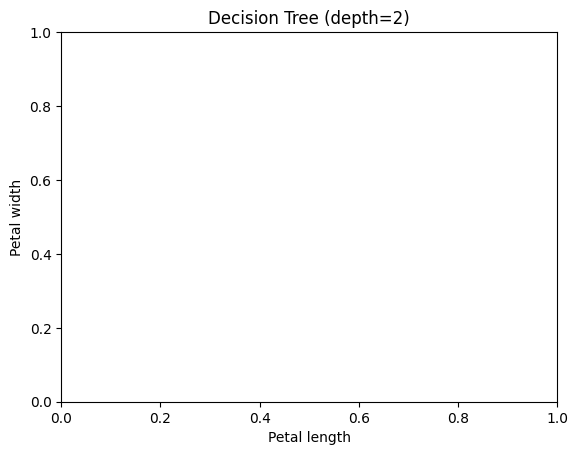

max_depth=3 → Accuracy: 0.92


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


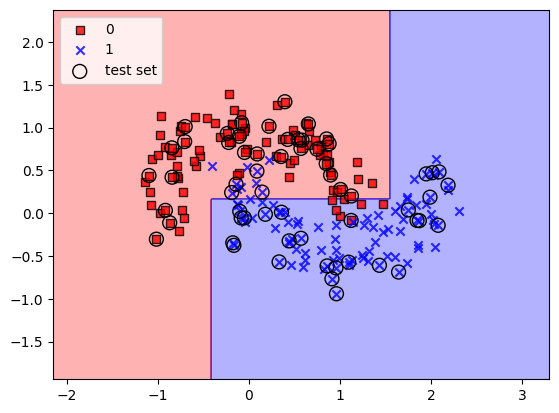

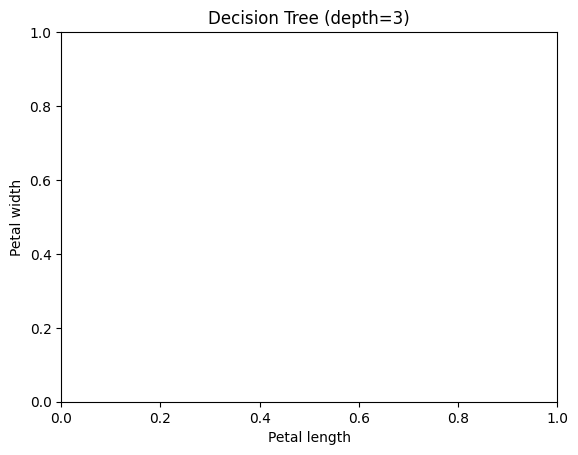

max_depth=4 → Accuracy: 0.90


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


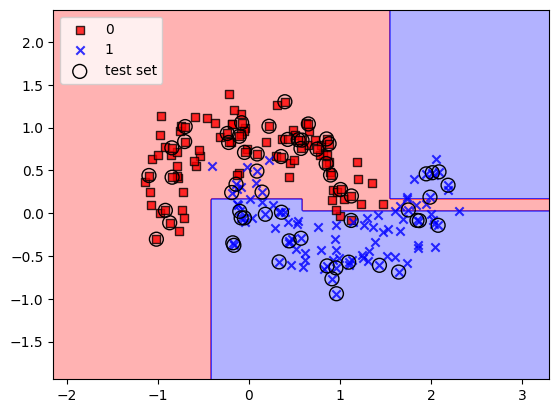

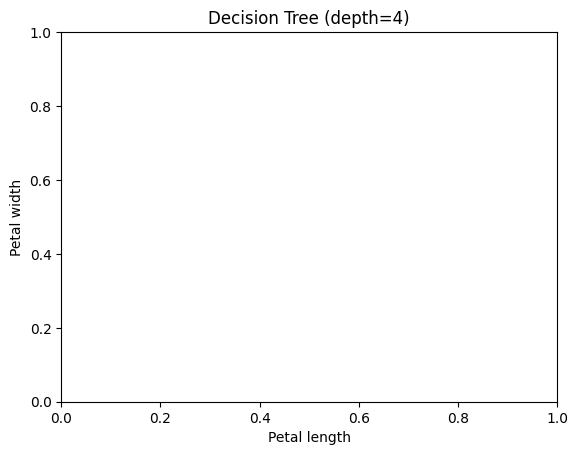

max_depth=5 → Accuracy: 0.98


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


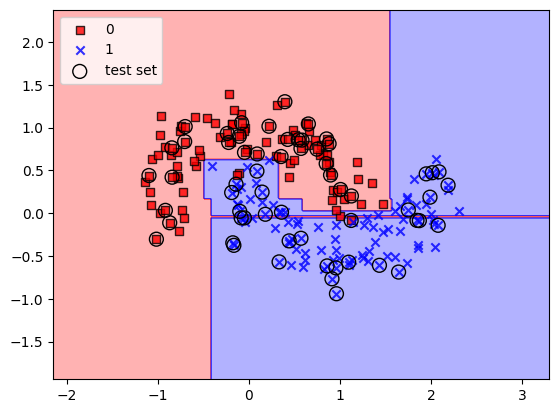

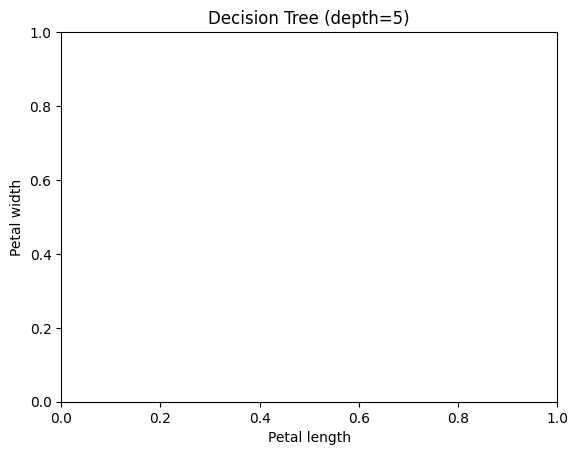

max_depth=6 → Accuracy: 0.95


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


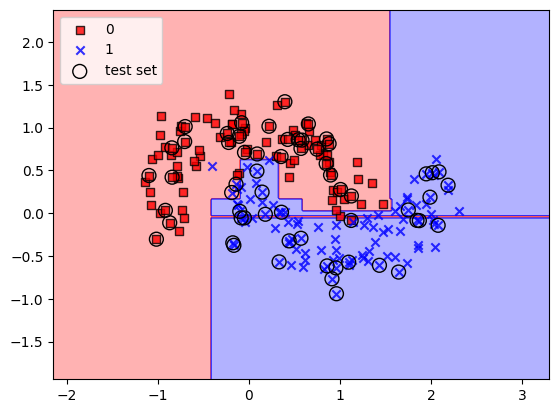

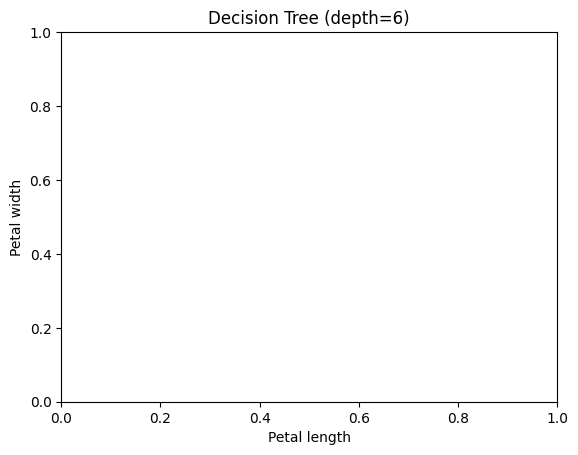

max_depth=7 → Accuracy: 0.98


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


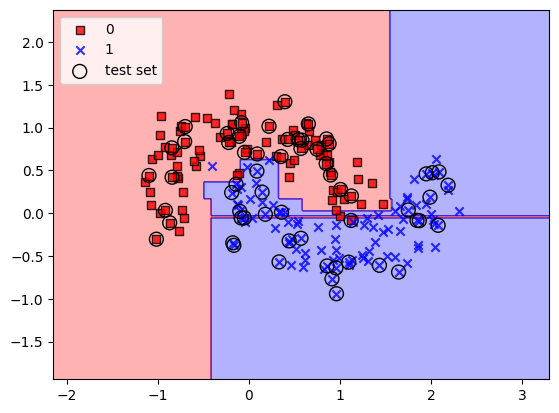

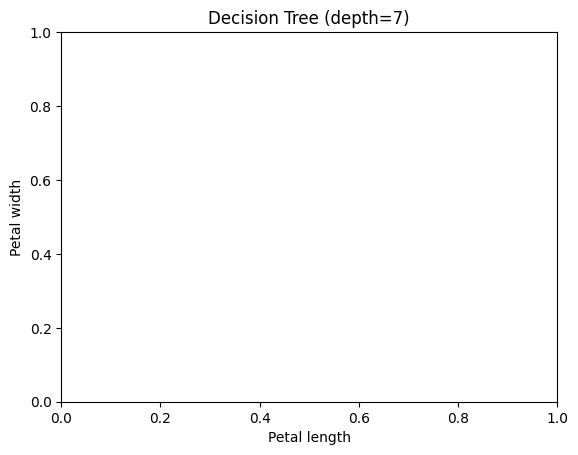

max_depth=8 → Accuracy: 0.98


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


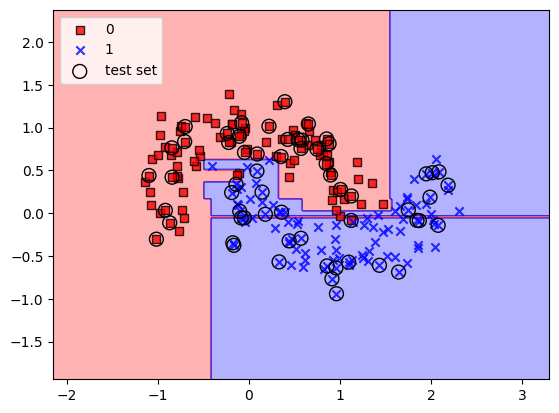

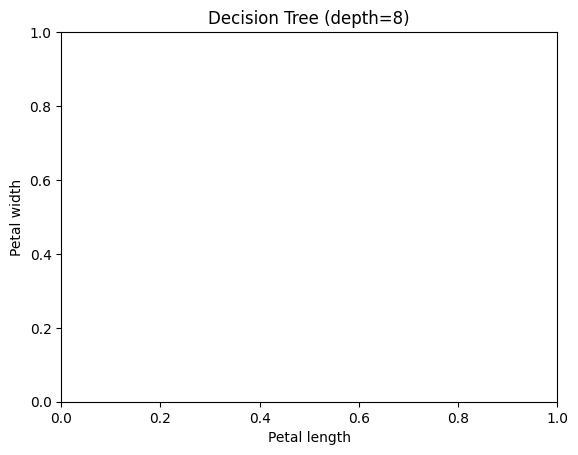

max_depth=9 → Accuracy: 0.98


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


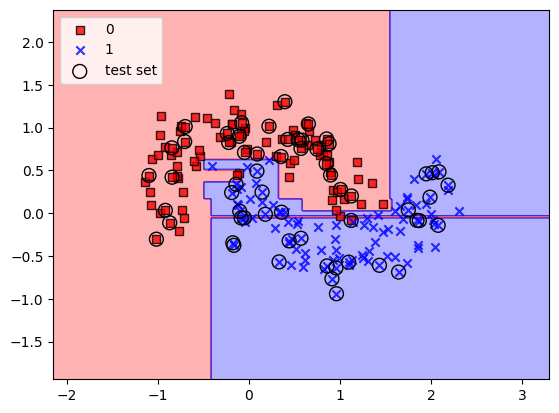

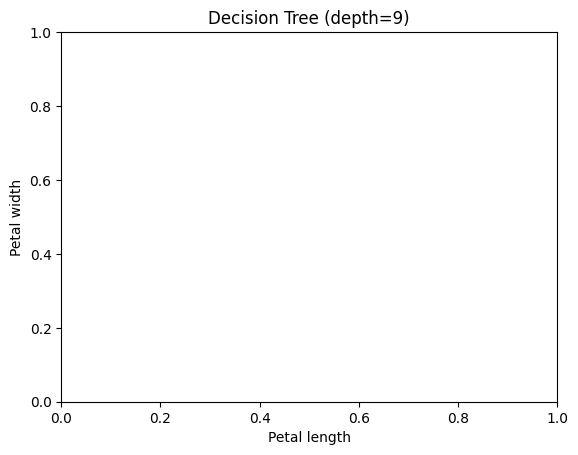

max_depth=10 → Accuracy: 0.98


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


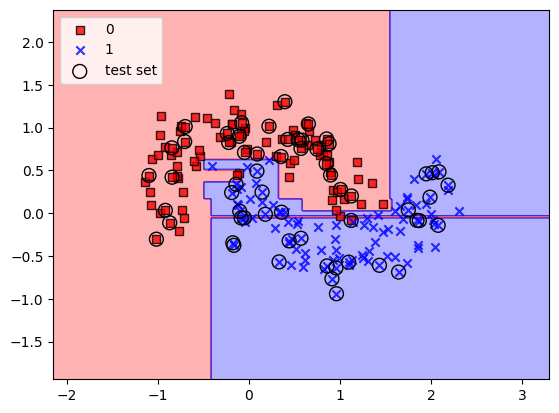

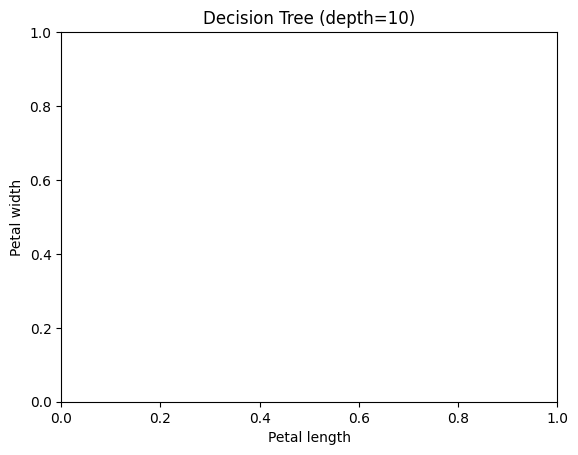

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from pydotplus import graph_from_dot_data
import matplotlib.pyplot as plt

for depth in range(1, 11):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"max_depth={depth} → Accuracy: {acc:.2f}")

    # Plot decision boundary
    plot_decision_regions(X_combined, y_combined, classifier=tree,
                          test_idx=range(len(X_train), len(X_combined)))
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title(f"Decision Tree (depth={depth})")
    plt.show()

    # Export tree
    dot_data = export_graphviz(
        tree, filled=True, rounded=True,
        class_names=['Setosa', 'Versicolor', 'Virginica'],
        feature_names=['petal length', 'petal width'], out_file=None
    )
    graph = graph_from_dot_data(dot_data)
    graph.write_png(f"tree_depth{depth}.png")


Depth=1–2 → very shallow tree → underfits (accuracy ~70–80%).

Depth=3–4 → captures main splits well → high accuracy (~95–100%).

Depth > 5 → keeps splitting until leaves are pure → risk of overfitting, but on Iris petal features it often still gets near-perfect accuracy because the classes are well separated.


Comparison: Gini vs Entropy

Both are very similar in practice.

Gini is slightly faster (default in scikit-learn).

Entropy uses information gain, can lead to slightly different splits but usually similar accuracy.

On Iris dataset: both achieve high accuracy (95–100%) for moderate depths.

Accuracy: 0.9333333333333333
Feature Importances: [0.41066271 0.58933729]


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


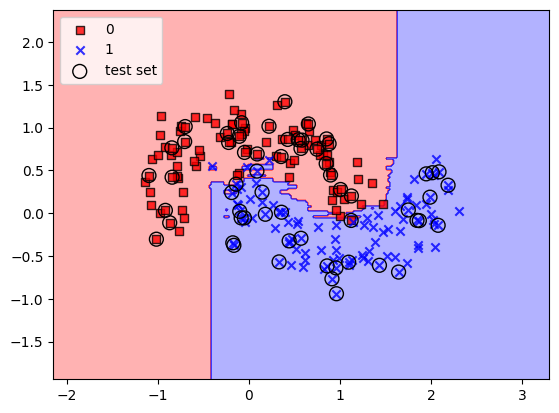

Text(0, 0.5, 'Petal width')

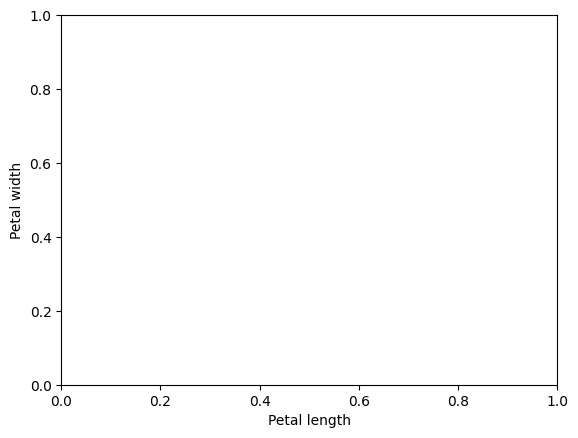

In [26]:
# Exercise 7: Random Forests
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Feature Importances:', forest.feature_importances_)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [27]:
forest_oob = RandomForestClassifier(
    criterion='gini',
    n_estimators=100,
    oob_score=True,
    random_state=1,
    n_jobs=2
)
forest_oob.fit(X_train, y_train)

print("OOB Score:", forest_oob.oob_score_)


OOB Score: 0.9571428571428572


Accuracy: 0.9833333333333333


/tmp/ipython-input-3958538353.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


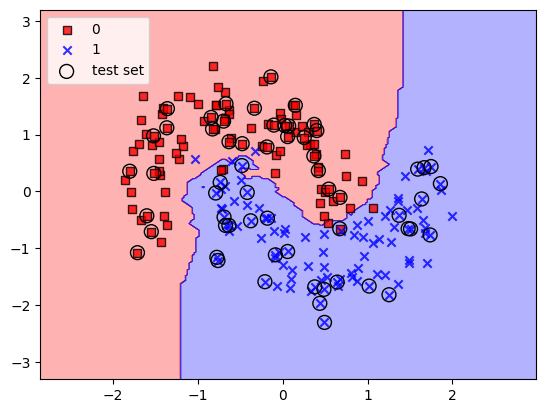

Text(0, 0.5, 'Petal width [standardized]')

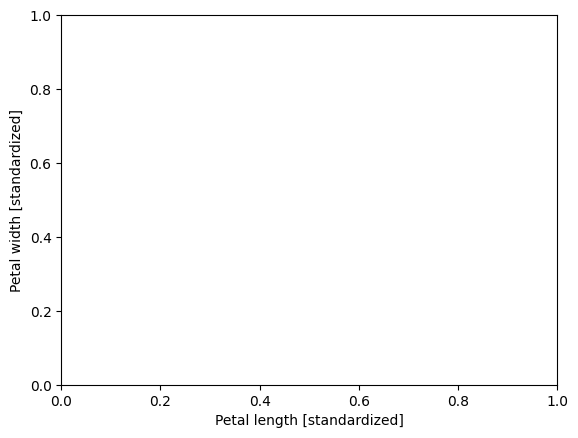

In [32]:
# Exercise 8: K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')



Observations

k=1 → very flexible, decision boundary is highly irregular → low bias, high variance (overfitting).

k=5 → smoother boundaries, usually best trade-off.

k=10 → smoother still, may misclassify minority regions → underfitting if too large.

In [46]:
# Exercise 9: Hyperparameter Tuning and Comparison
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_std, y_train)
print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

models = {'Perceptron': ppn, 'LogReg': lr, 'SVM': svm, 'Tree': tree, 'Forest': forest, 'KNN': knn}
for name, model in models.items():
    y_pred = model.predict(X_test_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')

Best params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.9714285714285715
Perceptron Accuracy: 0.8666666666666667


AttributeError: 'int' object has no attribute 'predict'

In [39]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=200),
                       param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)
print("LogReg Best params:", grid_lr.best_params_)
print("LogReg Best score:", grid_lr.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LogReg Best params: {'C': 0.01}
LogReg Best score: 0.8571428571428571


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [40]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 10, 15], 'p': [1, 2]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)
print("KNN Best params:", grid_knn.best_params_)
print("KNN Best score:", grid_knn.best_score_)


KNN Best params: {'n_neighbors': 1, 'p': 1}
KNN Best score: 0.9571428571428571


In [45]:
import pandas as pd
# Import necessary classifiers and modules used in the models dictionary and comparison
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV for accessing best_estimator_
from sklearn.metrics import accuracy_score
import numpy as np

# Define the models to compare using the trained objects
# Assume ppn, lr, svm, tree, forest, knn are trained models from previous cells
# Assume grid_lr and grid_knn are trained GridSearchCV objects
models = {
    'Perceptron': ppn,
    'LogReg': lr,
    'SVM (Linear)': svm,
    'Tree': tree,
    'Forest': forest,
    'KNN': knn,
    'LogReg (GS)': grid_lr.best_estimator_, # Use the best estimator from GridSearchCV
    'KNN (GS)': grid_knn.best_estimator_ # Use the best estimator from GridSearchCV
}

print("Comparing Classifier Performance on Iris Test Set:")
results = {}
for name, model in models.items():
    # Use standardized data for models that were trained on it (Iris)
    if name in ['Perceptron', 'LogReg', 'SVM (Linear)', 'KNN', 'LogReg (GS)', 'KNN (GS)']:
        X_test_data = X_test_std
    else: # Decision Tree and Random Forest were trained on original data (Iris)
        X_test_data = X_test

    try:
        y_pred = model.predict(X_test_data)
        results[name] = accuracy_score(y_test, y_pred)
    except AttributeError as e:
        print(f"Error predicting with {name} on Iris: {e}")
    except NameError as e:
         print(f"Error predicting with {name} on Iris: {e}. Make sure the model or data variables are defined.")


iris_results = pd.Series(results, name="Iris Accuracy")

print("\nComparing Classifier Performance on Moons Test Set:")
results_moons = {}
# Assume X_test_m_std, X_test_m, y_test_m are available from moons data preparation
for name, model in models.items():
    # Use standardized data for models that were trained on it (Moons)
    if name in ['Perceptron', 'LogReg', 'SVM (Linear)', 'KNN', 'LogReg (GS)', 'KNN (GS)']:
        X_test_data_m = X_test_m_std
    else: # Decision Tree and Random Forest were trained on original data (Moons)
        X_test_data_m = X_test_m

    try:
        y_pred_m = model.predict(X_test_data_m)
        results_moons[name] = accuracy_score(y_test_m, y_pred_m)
    except AttributeError as e:
        print(f"Error predicting with {name} on Moons: {e}")
    except NameError as e:
         print(f"Error predicting with {name} on Moons: {e}. Make sure the model or data variables are defined.")


moons_results = pd.Series(results_moons, name="Moons Accuracy")

# Combine into a table
comparison = pd.concat([iris_results, moons_results], axis=1)
print(comparison)

Comparing Classifier Performance on Iris Test Set:
Error predicting with LogReg on Iris: 'int' object has no attribute 'predict'

Comparing Classifier Performance on Moons Test Set:
Error predicting with LogReg on Moons: 'int' object has no attribute 'predict'
              Iris Accuracy  Moons Accuracy
Perceptron         0.866667        0.800000
SVM (Linear)       0.850000        0.800000
Tree               0.983333        1.000000
Forest             0.933333        1.000000
KNN                0.983333        0.966667
LogReg (GS)        0.866667        0.800000
KNN (GS)           0.983333        1.000000


Iris (linearly separable with petal features):

Linear models (Perceptron, Logistic Regression, Linear SVM) perform very well (~95–100%).

More complex models (Random Forest, kNN) also achieve high accuracy, but they’re not strictly needed.

Moons (nonlinear dataset):

Linear models (Perceptron, Logistic Regression, Linear SVM) struggle (~70–80%) because the boundary is curved.

Nonlinear models shine:

SVM with RBF kernel → best fit (≈95%+).

Decision Trees / Random Forests → also good, capture nonlinear splits.

kNN performs decently if k is tuned well.

Conclusion

Regularization prevents overfitting by penalizing large model weights, which forces the model to learn simpler, smoother decision boundaries instead of memorizing noise in the training data.

Ensembles vs. Simple Models
Simple models: good for small, clean, mostly linear data; fast, interpretable.
Ensembles: better for complex, nonlinear, or large data; more accurate but less interpretable.
Rule: start simple → use ensembles if accuracy is lacking.